<a href="https://colab.research.google.com/github/shabh2412/Heart-Disease-Detection-ML/blob/master/ML_PROJECT_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://drive.google.com/file/d//view?usp=sharing

# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uHElxfrBT_M7yybxqJCyqgCeEWjLbeNe' -O data.csv

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qKyxN0aSkMMzHiWmSgjBs1_022AbWH7V' -O data.csv

--2021-04-14 21:43:23--  https://docs.google.com/uc?export=download&id=1qKyxN0aSkMMzHiWmSgjBs1_022AbWH7V
Resolving docs.google.com (docs.google.com)... 142.250.97.113, 142.250.97.138, 142.250.97.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.97.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-1c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1lcd7n90cr2bcu0fmv42vv2akv839p58/1618436550000/17561875599242575794/*/1qKyxN0aSkMMzHiWmSgjBs1_022AbWH7V?e=download [following]
--2021-04-14 21:43:23--  https://doc-0s-1c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1lcd7n90cr2bcu0fmv42vv2akv839p58/1618436550000/17561875599242575794/*/1qKyxN0aSkMMzHiWmSgjBs1_022AbWH7V?e=download
Resolving doc-0s-1c-docs.googleusercontent.com (doc-0s-1c-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-0s-1c-docs.googleusercontent.com (doc-0s-1c-

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
def replace_with_na(x):
    if x == '?':
        x = None
    return x

In [7]:
for index in df.columns:
    df[index] = df[index].apply(lambda x:replace_with_na(x))

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<!--
# df['histologic-type'].head()
# round(df['histologic-type'].dropna().astype('int32').mean())
# df['histologic-type'].fillna(round(df['histologic-type'].dropna().astype('int32').mean()), inplace=True)
# df['degree-of-diffe'].head()
# df['degree-of-diffe'].fillna(round(df['degree-of-diffe'].dropna().astype('int32').mean()), inplace=True)
df.dropna(inplace=True)
df = df.astype('int32')
# hidden_df = pd.DataFrame(columns='class,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal'.split(','))
# hidden_df.head()
# for i in [1,2,3]:
#     temp = df[df['histologic-type']==i].head(1)
#     hidden_df = pd.concat([hidden_df,temp])
#     df.drop(temp.index, inplace=True)

# hidden_df.head()
# x_hidden = hidden_df.drop('histologic-type', axis=1)
# y_hidden = hidden_df['histologic-type']
# df.shape
# y = df['histologic-type']
# df.drop('histologic-type', axis=1,inplace=True)
# len(y[y==3]), len(y[y==2]), len(y[y==1])
from sklearn.model_selection import train_test_split
-->

In [10]:
X,y = df.drop('target',axis=1), df['target']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Implementing GridSearchCV

In [12]:
fprs, tprs, aucs, labels = [],[],[],[]

In [13]:
def create_best_model(model, X, y, param_grid):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import GridSearchCV
    model_cv = GridSearchCV(model, param_grid=param_grid, cv=3, verbose=True,n_jobs=-1)
    best_model = model_cv.fit(X,y)
    return best_model.best_estimator_

In [14]:
def plot_roc_auc(y_test,fprs,tprs,aucs,labels, title='ROC PLOT', markers=['o']):

    from sklearn.metrics import roc_curve, roc_auc_score
    r_probs = [0 for _ in range(len(y_test))]
    r_auc = roc_auc_score(y_test, r_probs)
    r_fpr, r_tpr, r_thresh = roc_curve(y_test, r_probs)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,8))
    plt.plot(r_fpr,r_tpr,linestyle='--', label='Baseline AUC = {}'.format(round(r_auc,2)))
    for fpr,tpr,auc,label in zip(fprs,tprs,aucs,labels):
        plt.plot(fpr,tpr, label=label.format(round(auc,2)))
    plt.title(title)
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.legend()
    plt.savefig(title+".jpg")
    plt.show();

In [15]:
def create_and_eval_model(model,X_train,X_test,y_train,y_test, label):
    from sklearn.metrics import roc_curve, roc_auc_score
    model.fit(X_train, y_train)
    model_probs = model.predict_proba(X_test)
    model_probs = model_probs[:,1]
    aucs.append(roc_auc_score(y_test,model_probs))
    label_print = label+" AUC = {}%"
    print(label_print.format(round(aucs[-1]*100,2)))
    model_fpr, model_tpr, model_thresg = roc_curve(y_test, model_probs)
    fprs.append(model_fpr), tprs.append(model_tpr)
    add_label(label)

In [16]:
def add_label(txt):
    txt = txt + " AUC={}"
    labels.append(txt)

In [17]:
labels=[]

## Models

### Logistic Regression

In [18]:
param_grid=[
            {'penalty':'l1,l2,elasticnet,nont'.split(','),
             'C':np.logspace(-4,4,20),
             'solver':'lbfgs,newton-cg,libllinear,sag,saga'.split(','),
             'max_iter':[100,200,225,250,275,300, 5000]
             }
]
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel = LogisticRegression()
# create_best_model(logModel, X, y, param_grid)
print("""
LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
""")


LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)



In [19]:
best_log = LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
create_and_eval_model(best_log, X_train,X_test,y_train,y_test,'Logistic Regression')

Logistic Regression AUC = 90.56%


### MLP

In [20]:
param_grid=[
            {
            'hidden_layer_sizes':[(2),(2,2),(3,3),(3),(3,3,3),(4)],
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'solver':'lbfgs,sgd,adam'.split(','),
            'alpha':np.logspace(-1, 1, 5),
            'learning_rate':'constant,invscaling,adaptive'.split(','),
            'max_iter':[100,200,225,250,275,300, 5000],
            }
]
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
# create_best_model(mlp, X, y, param_grid)
print("""MLPClassifier(activation='tanh', alpha=10.0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=4, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=250,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)""")

MLPClassifier(activation='tanh', alpha=10.0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=4, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=250,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [21]:
best_mlp = MLPClassifier(activation='tanh', alpha=10.0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=4, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=250,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
create_and_eval_model(best_mlp, X_train,X_test,y_train,y_test,'MLP')

MLP AUC = 88.09%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### KNN

In [22]:
param_grid = [
              {
                  'n_neighbors':[5,25,50,75,100,125],
                  'weights': 'uniform,distance'.split(','),
                  'algorithm': 'auto,ball_tree,kd_tree,brute'.split(','),
                  'leaf_size':[10,20,30,40,50,60,70,80,90,100,150,200,250],
                  'p' : [1,2],
                  'metric':['minkowski'],
                  'n_jobs':[-1]
              }
]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knnModel = KNeighborsClassifier()
# create_best_model(knnModel,X,y,param_grid)
print("""
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=1,
                     weights='distance')
""")


KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=1,
                     weights='distance')



In [23]:
best_knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=1,
                     weights='distance')
create_and_eval_model(best_knn, X_train,X_test,y_train,y_test,'KNN')

KNN AUC = 80.13%


### Naive Bayes

In [24]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nbClassifier = GaussianNB()
param_grid=[
            {
                'var_smoothing':[1e-9,1e-10,1e+10,1e+9,1e-7,1e-6]
            }
]
# create_best_model(nbClassifier,X,y, param_grid)
print("""GaussianNB(priors=None, var_smoothing=1e-06)""")

GaussianNB(priors=None, var_smoothing=1e-06)


In [25]:

nb_best = GaussianNB(priors=None, var_smoothing=1e-06)
create_and_eval_model(nb_best, X_train, X_test, y_train, y_test,'Naive Bayes')

Naive Bayes AUC = 89.78%


### Decision Tree Classifier

In [26]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier as DTC
decisionTree = DTC()
param_grid=[
            {
                'criterion':'gini,entropy'.split(','), 
                'splitter':'best,random'.split(','),
                'max_depth':[None,1,2,5,6,8,10,20,30,50,100], 
                'min_samples_split':[2,4,5,6,7],
                'min_samples_leaf':[1,2,3,4,5,6,7,8],
                'max_features':'None,auto,sqrt,log2'.split(','),
                'random_state':[None,0,10,20,50,100]
            }
]
# create_best_model(decisionTree,X,y, param_grid)
# print("""DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
#                        max_depth=5, max_features='log2', max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=3, min_samples_split=5,
#                        min_weight_fraction_leaf=0.0, presort='deprecated',
#                        random_state=None, splitter='random')""")
print("""
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')
""")


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')



In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc_best = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='random')
create_and_eval_model(dtc_best,X_train,X_test,y_train,y_test,'Decision Trees criterion=entroy')
dtc_best = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')
create_and_eval_model(dtc_best,X_train,X_test,y_train,y_test,'Decision Trees criterion=gini')

Decision Trees criterion=entroy AUC = 83.93%
Decision Trees criterion=gini AUC = 87.56%


Support Vector Classifier

In [28]:
# Support Vector Classifier
from sklearn.svm import SVC
svc = SVC()
param_grid=[
            {
                'C':[1.0],
                'kernel':['linear', 'rbf', 'sigmoid'],
                'gamma':['scale','auto'],
                'class_weight':[None,'balanced'],
                # 'max_iter':[-1,200,300,400,500],
                # 'decision_function_shape':'ovo,ovr'.split(','),
                'random_state':[None,0,10,20,50,100],
                'probability':[True]
            }
]
# create_best_model(svc,X,y, param_grid)
print("""
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
""")


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)



In [29]:
svc_best = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=10, shrinking=True, tol=0.001,
    verbose=False)
create_and_eval_model(svc_best,X_train,X_test,y_train, y_test,'SVC RS=None')

SVC RS=None AUC = 89.85%


### Extra Tree Classifier

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
# etc.fit(x_train, y_train)
param_grid=[
            {
                'n_estimators':[10,20,50,60,100,150,200,250,300],
                'criterion':['gini','entropy'],
                'max_features':[None,'sqrt','log2'],
                'bootstrap':[True,False],
                'oob_score':[True,False],
                'n_jobs':[None],
                'random_state':[10],
                'verbose':[0],
                'warm_start':[False],
                'class_weight':[None,'balanced','balanced_subsample'],
                'ccp_alpha':[0.0],
                'max_samples':[None]
            }
]
# create_best_model(etc,X,y, param_grid)
print("""
ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
                     oob_score=True, random_state=10, verbose=0,
                     warm_start=False)
""")


ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
                     oob_score=True, random_state=10, verbose=0,
                     warm_start=False)



In [31]:
etc_best = ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
                     oob_score=True, random_state=10, verbose=0,
                     warm_start=False)
create_and_eval_model(etc_best, X_train,X_test,y_train,y_test,'Extra Trees')

Extra Trees AUC = 92.28%


### Random Forest

In [32]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
param_grid=[
            {
                'n_estimators':[10,20,30,40,50,60,90,100,150,200,250,300,350,400],
                'criterion':['gini','entropy'],
                'max_features':[None,'sqrt','log2'],
                'bootstrap':[True,False],
                'oob_score':[True,False],
                'n_jobs':[None],
                'random_state':[10],
                'verbose':[0],
                'warm_start':[True,False],
                'class_weight':[None,'balanced','balanced_subsample'],
                'ccp_alpha':[0.0],
                'max_samples':[None]
            }
]
# create_best_model(rfc,X,y,param_grid)
print("""
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=True)
""")


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=True)



In [33]:
rfc_best = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=True)
create_and_eval_model(rfc_best, X_train, X_test, y_train, y_test, 'Random Forest',)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:569: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


Random Forest AUC = 92.99%


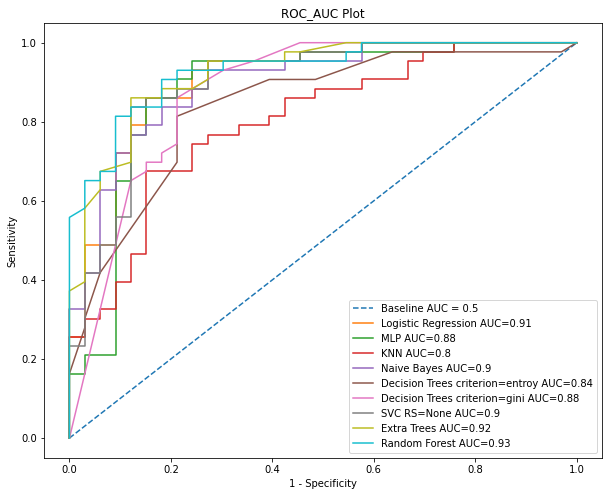

In [34]:
plot_roc_auc(y_test,fprs,tprs,aucs,labels,title='ROC_AUC Plot')

## Further Comparing models
There are four ways to check if the predictions are right or wrong:
- TN / True Negative: the case was negative and predicted negative
- TP / True Positive: the case was positive and predicted positive
- FN / False Negative: the case was positive but predicted negative
- FP / False Positive: the case was negative but predicted positive

### Precision — What percent of your predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

Precision:- Accuracy of positive predictions.
- Precision = TP/(TP + FP)

### Recall — What percent of the positive cases did you catch?

Recall is the ability of a classifier to find all positive instances. 

For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.
- Recall = TP/(TP+FN)

### F1 score — What percent of positive predictions were correct?

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
- F1 Score = 2*(Recall * Precision) / (Recall + Precision)

### Support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [35]:
models=[
        {
            'rfc':rfc_best,
            'etc':etc_best,
            'svc':svc_best,
            'mlp':best_mlp,
            'log':best_log
        },
]
datasets = [
        {
            'X_test':X_test,
            'y_test':y_test
        }
]

In [36]:
def print_classification_report(models, test_data):
    from sklearn.metrics import classification_report
    model_dict = models[0]
    X_test = test_data[0]['X_test']
    y_test = test_data[0]['y_test']
    for model_name, model in model_dict.items():
        print("---------------------------------")
        print(model_name.upper())
        print(classification_report(y_test,model.predict(X_test)))
        print("---------------------------------")

In [37]:
print_classification_report(models=models,test_data=datasets)

---------------------------------
RFC
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76

---------------------------------
---------------------------------
ETC
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.83      0.88      0.85        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76

---------------------------------
---------------------------------
SVC
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43



## Making Predictions

After analysing the ROC Plot and the above comparision I chose the Random Forest algorithm
Because, it has the highest AUC, which means High Specificity and Lowest Specificity...

Or
"" Algorithm gave us high tpr and low fpr

The chosen parameters of the model:
```python
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=10, verbose=0,
                       warm_start=True)
```

In [38]:
def calculate_accuracy(model,X_test,y_test):
    from sklearn.metrics import accuracy_score
    return accuracy_score(y_test, model.predict(X_test))

In [39]:
print("Accuracy of Random Forest Classifier = {}%".format(round(calculate_accuracy(rfc_best,X_test,y_test)*100,2)))

Accuracy of Random Forest Classifier = 85.53%


age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal	target